<a href="https://colab.research.google.com/github/bahar2025-AI/heart-disease-analysis/blob/main/Advanced_Data_Preprocessing_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2025-03-10 14:31:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘heart_disease.csv’

heart_disease.csv       [ <=>                ]  18.03K  --.-KB/s    in 0.1s    

2025-03-10 14:31:14 (125 KB/s) - ‘heart_disease.csv’ saved [18461]

Loading dataset...

Dataset Overview:
Shape: (303, 14)

First 5 rows:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2

<Figure size 1200x600 with 0 Axes>

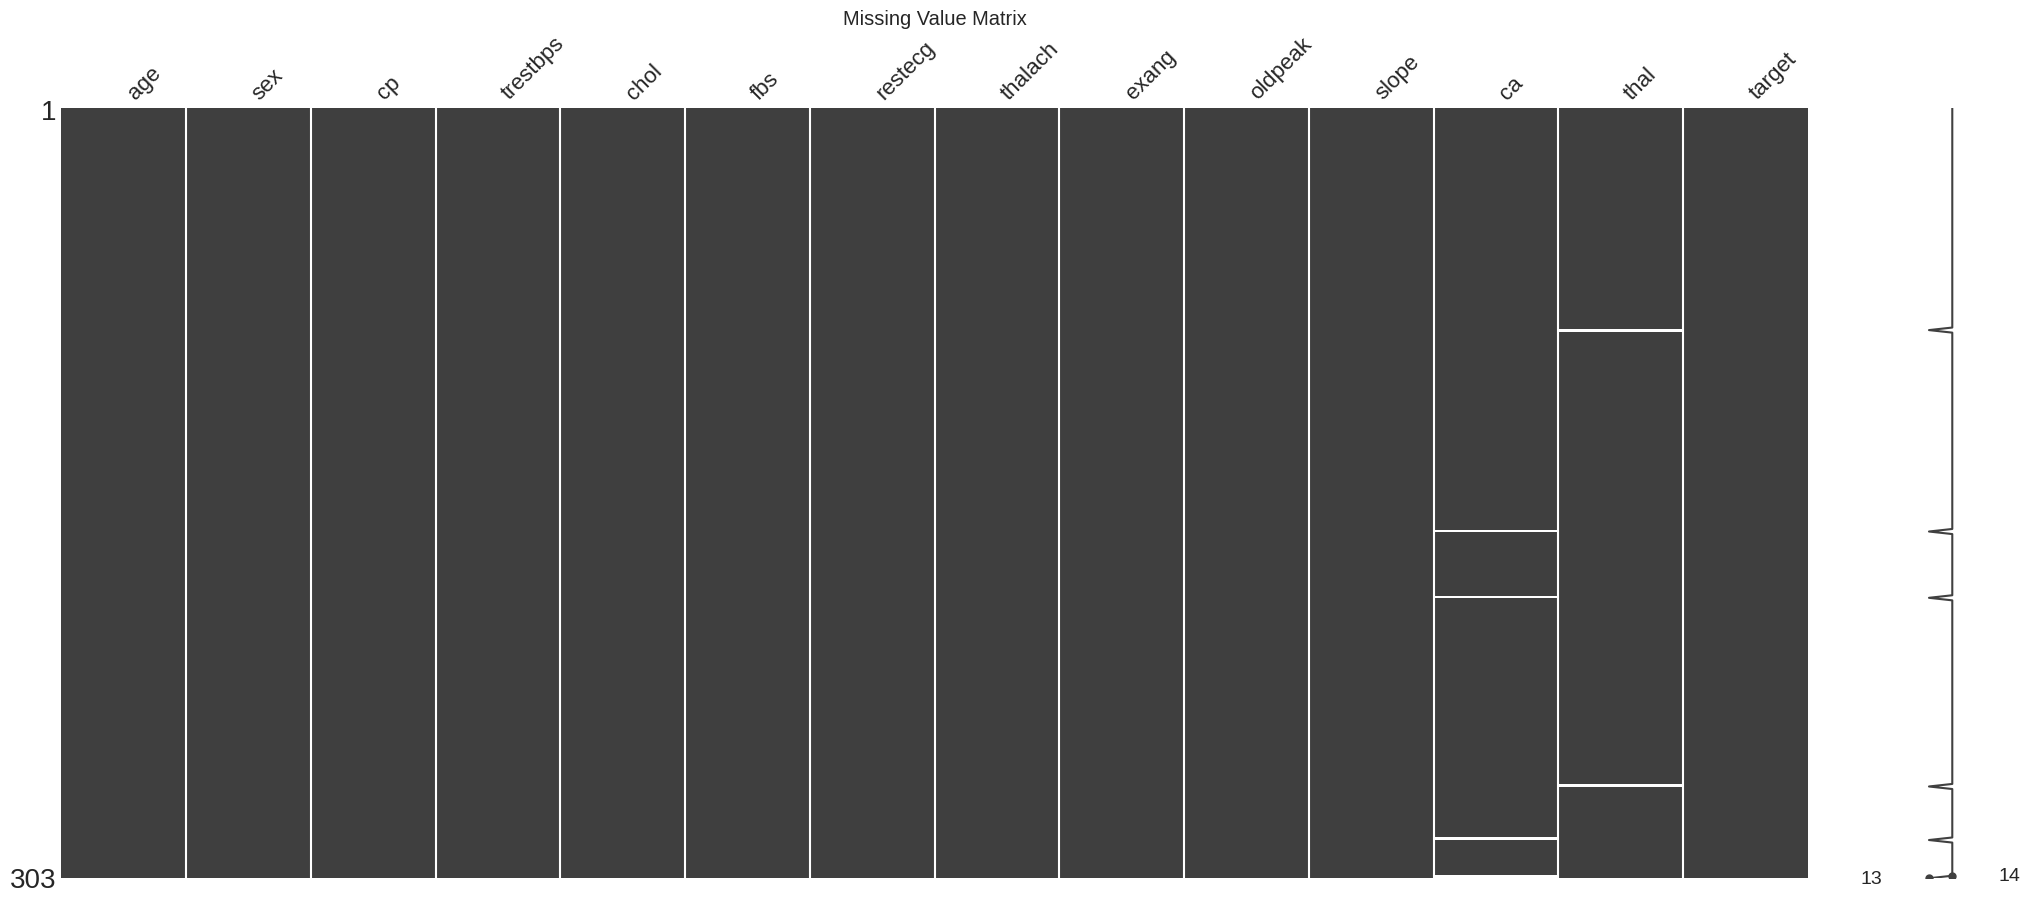

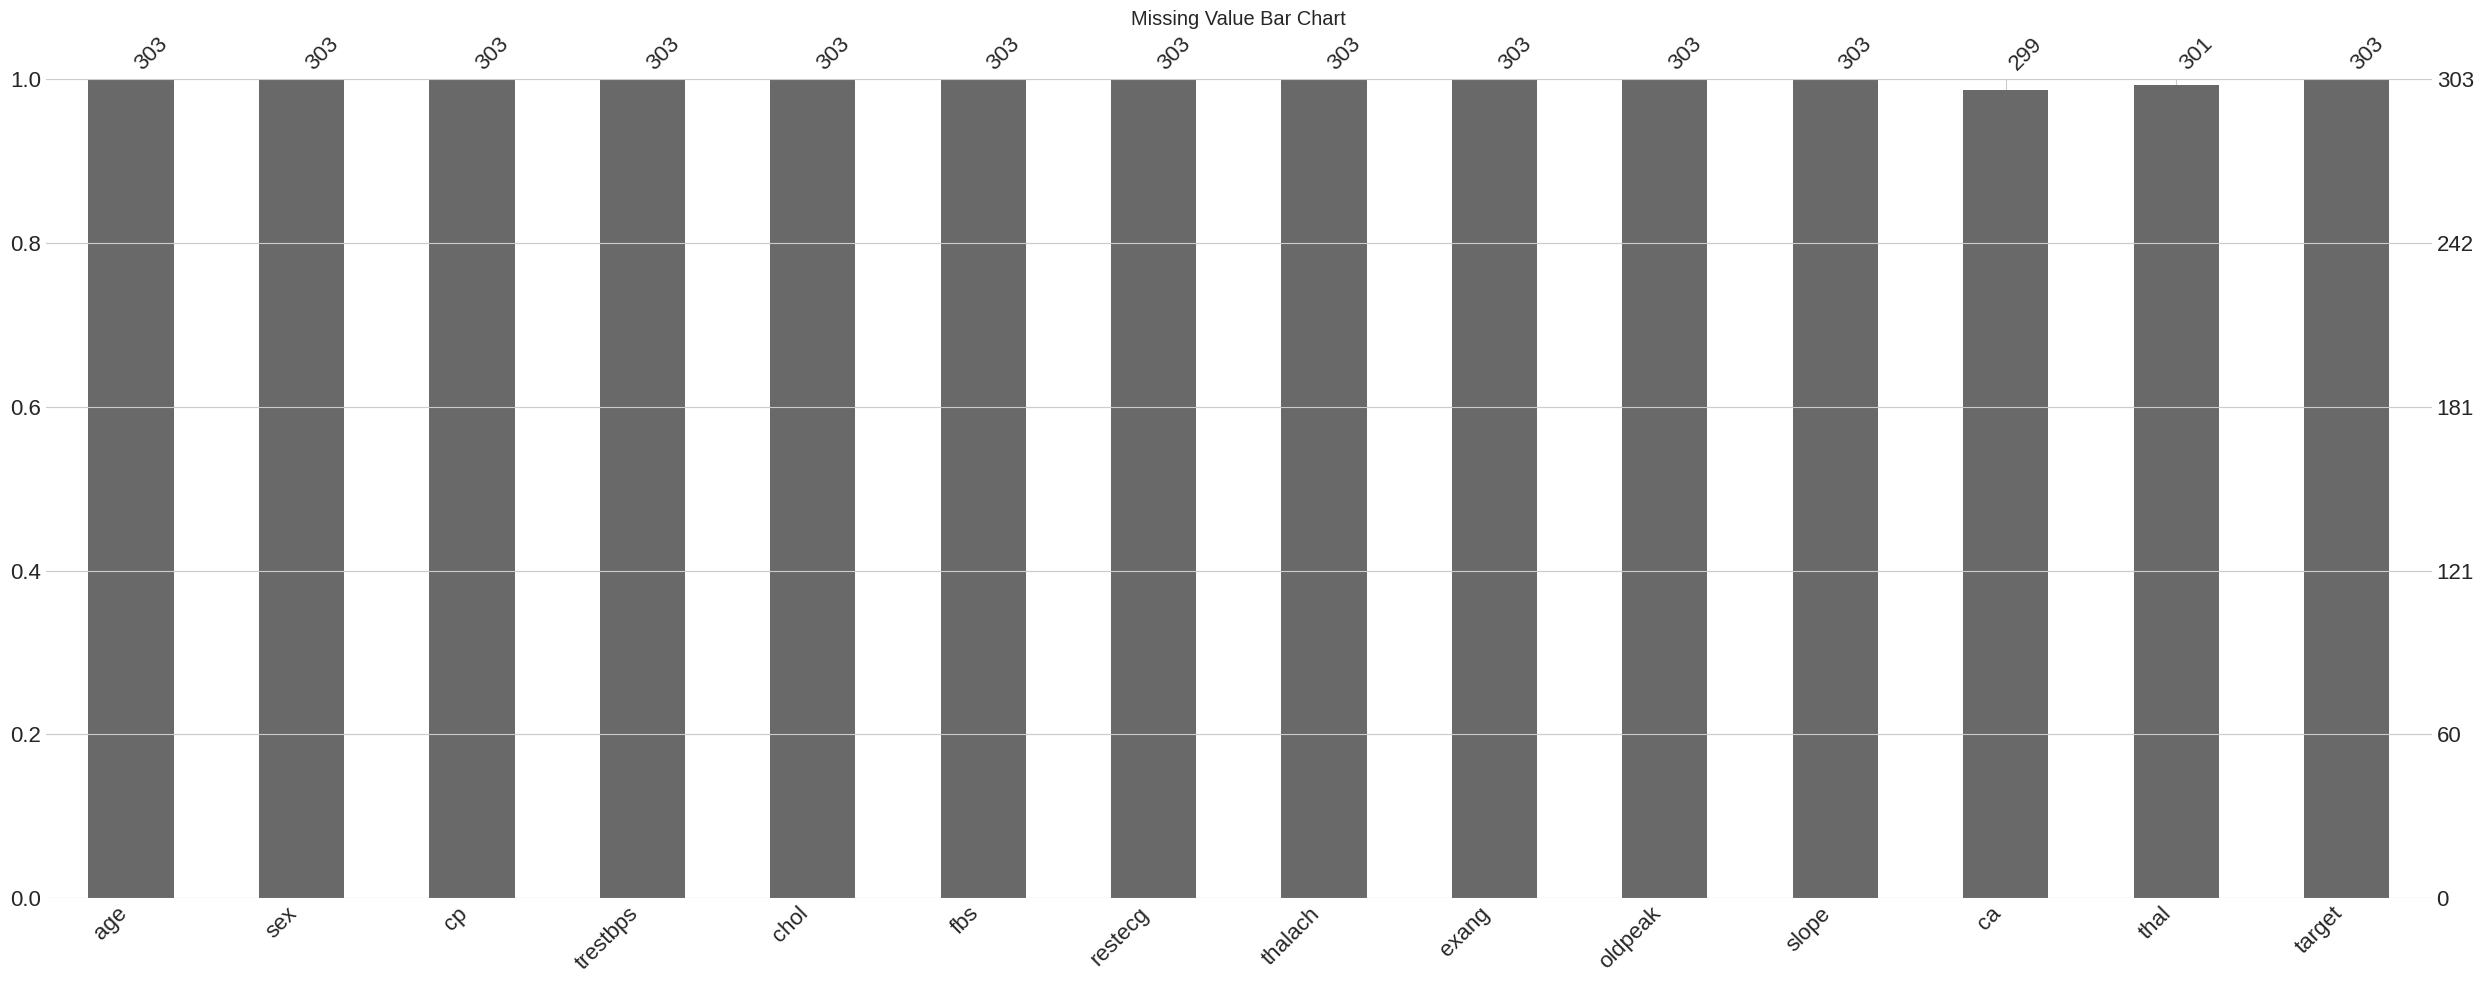


Imputing missing values...
Missing values after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

========== OUTLIER ANALYSIS ==========


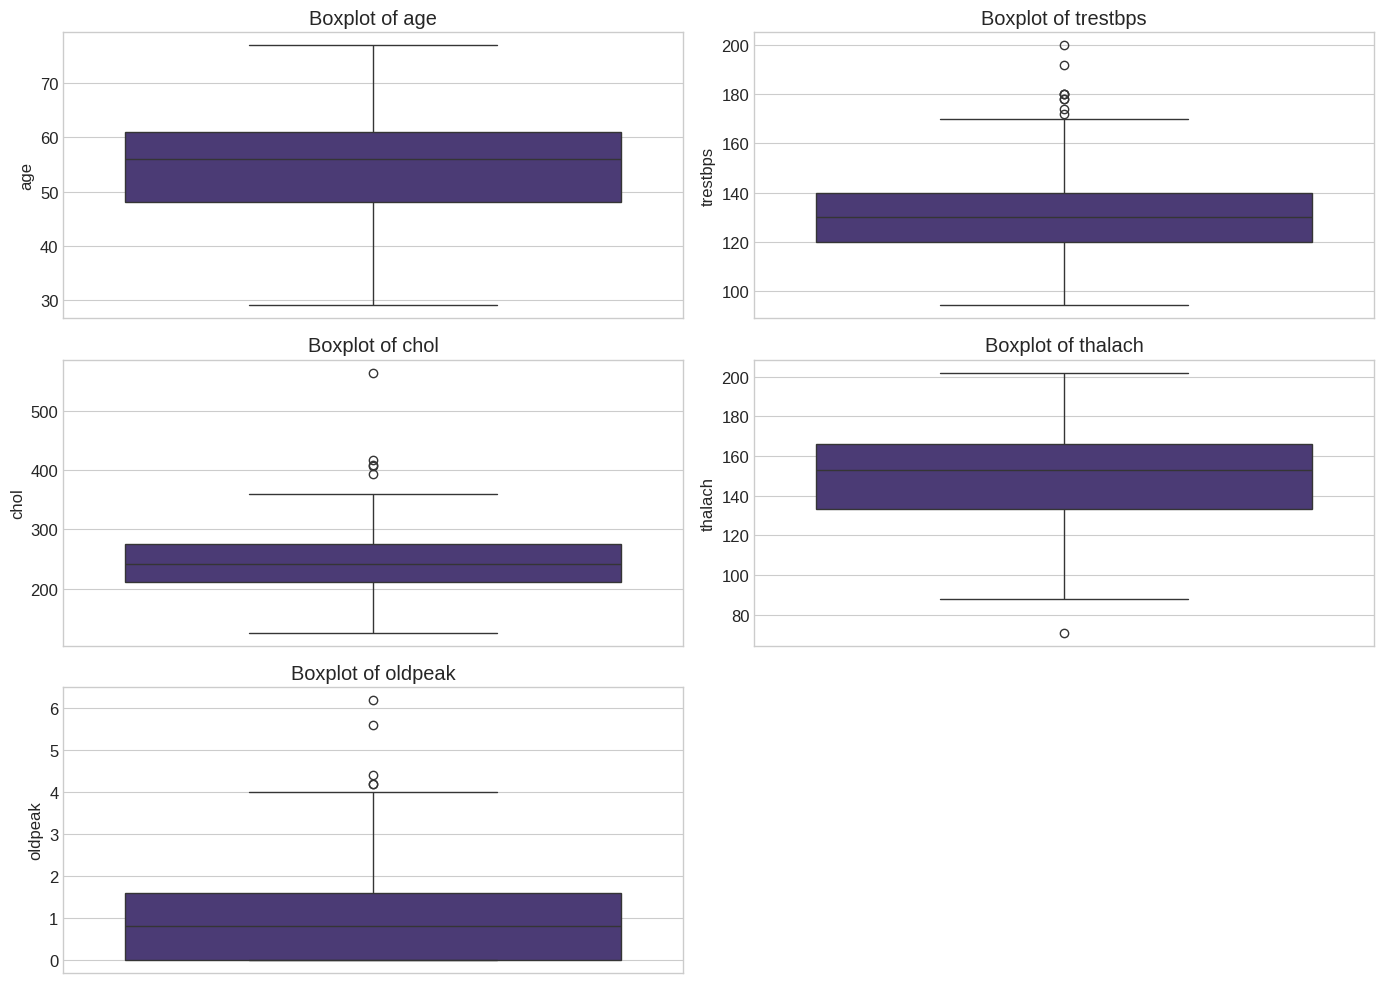


Detecting outliers with Isolation Forest...
Number of detected outliers: 16

Treating outliers with capping method...

========== FEATURE ENGINEERING ==========

Scaling numerical features...

Results of feature engineering:
    age age_group   chol  chol_level  trestbps      bp_category        bmi  \
0  63.0     55-70  233.0  Borderline     145.0     Hypertension  27.489687   
1  67.0     55-70  286.0        High     160.0     Hypertension  26.268629   
2  67.0     55-70  229.0  Borderline     120.0           Normal  24.646701   
3  37.0       <40  250.0        High     130.0  Prehypertension  27.445133   
4  41.0     40-55  204.0  Borderline     130.0  Prehypertension  23.524700   
5  56.0     55-70  236.0  Borderline     120.0           Normal  29.600921   
6  62.0     55-70  268.0        High     140.0  Prehypertension  20.848722   
7  57.0     55-70  354.0        High     120.0           Normal  22.723767   
8  63.0     55-70  254.0        High     130.0  Prehypertension  33.4780

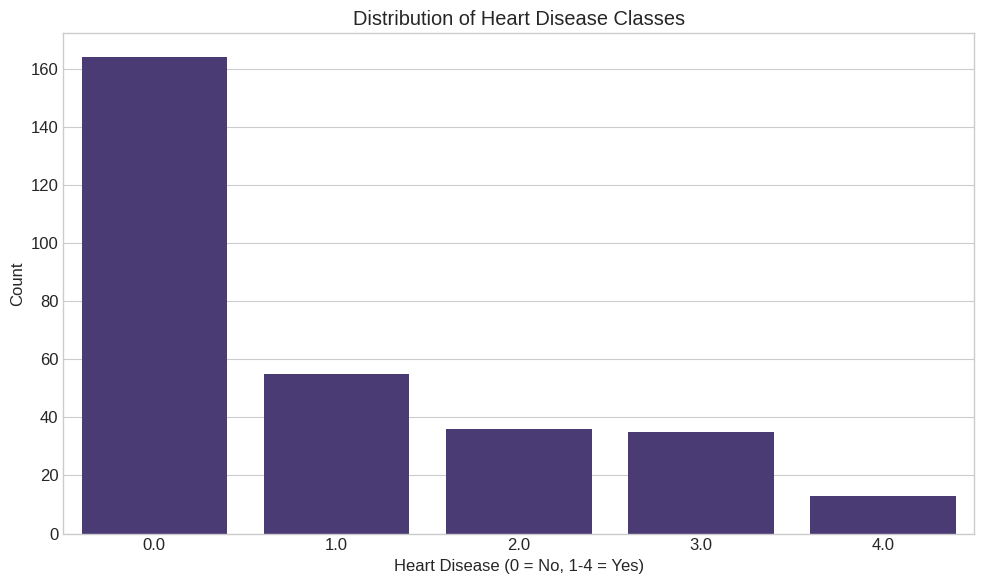

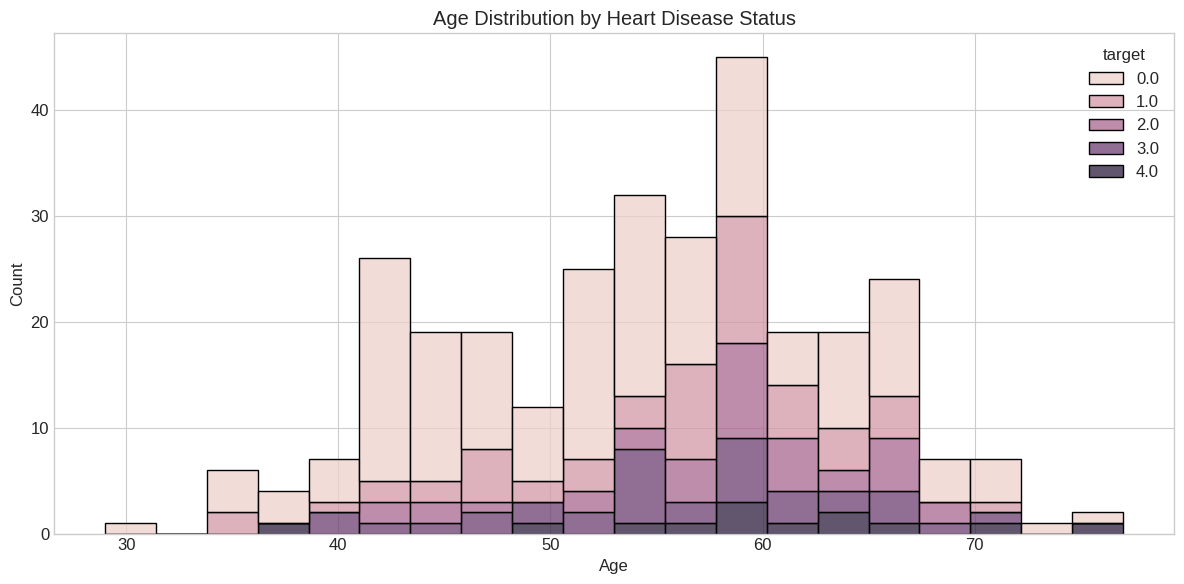

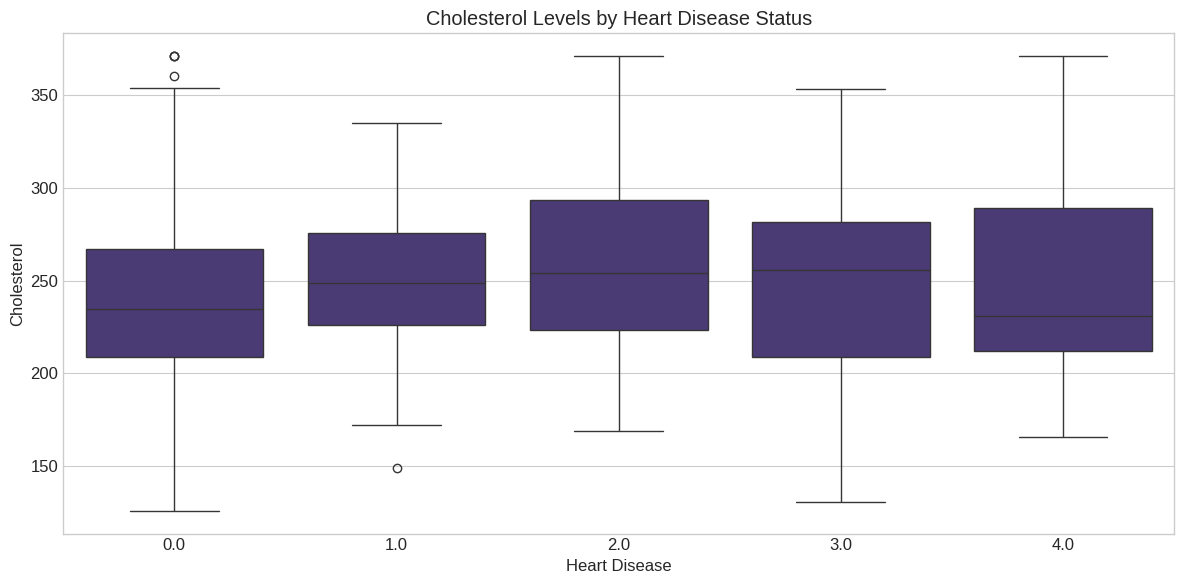

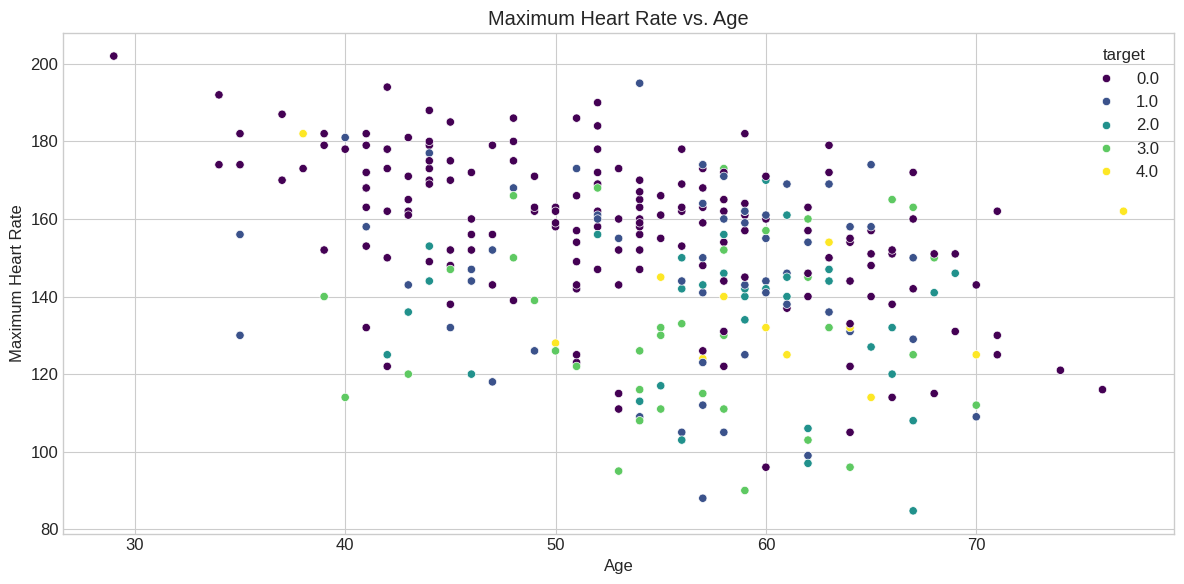

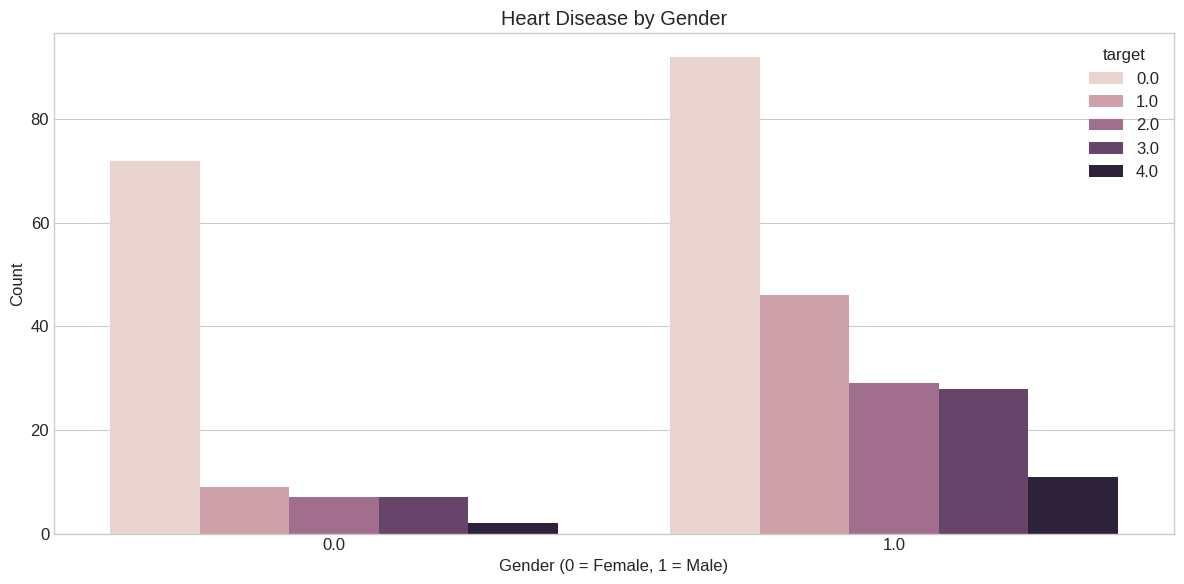

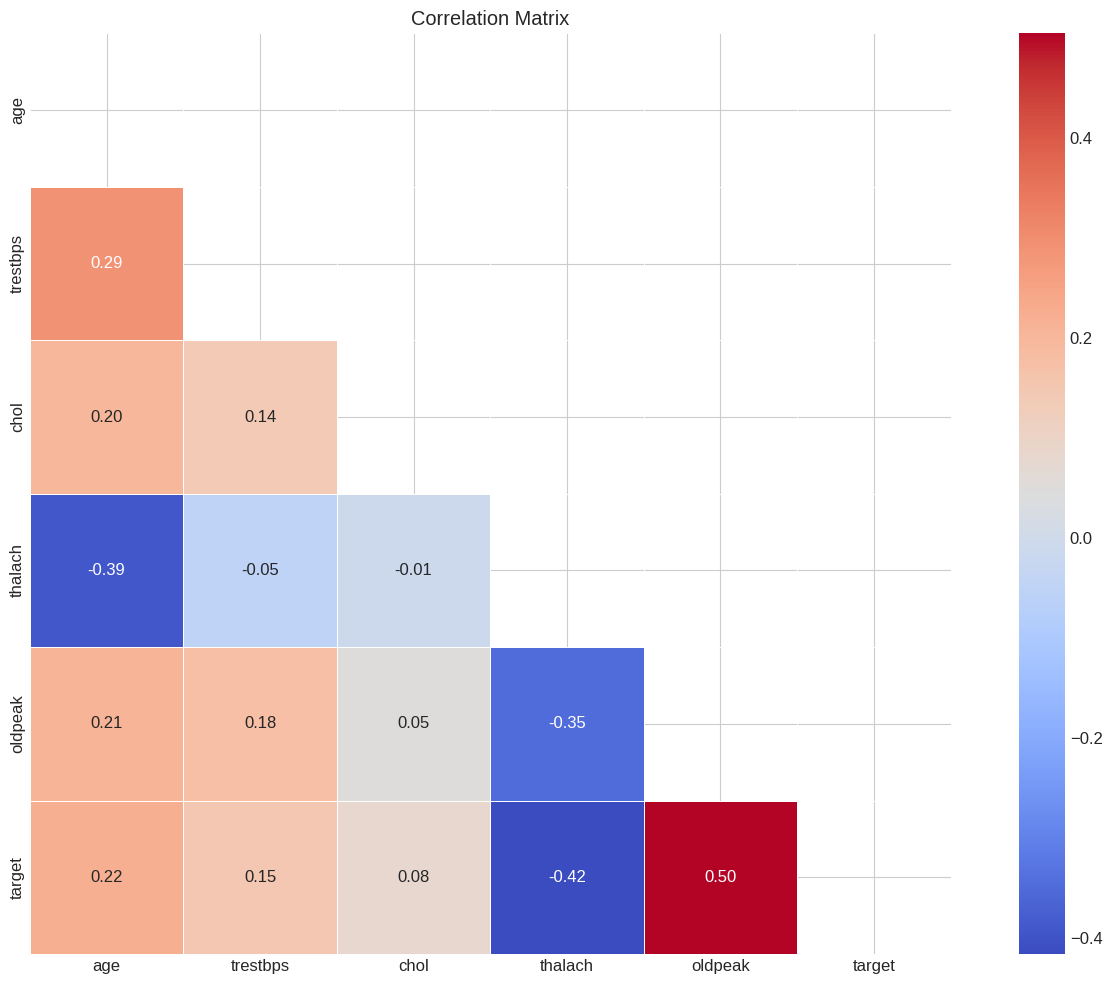


========== ADVANCED VISUALIZATIONS ==========



========== DIMENSIONALITY REDUCTION ==========


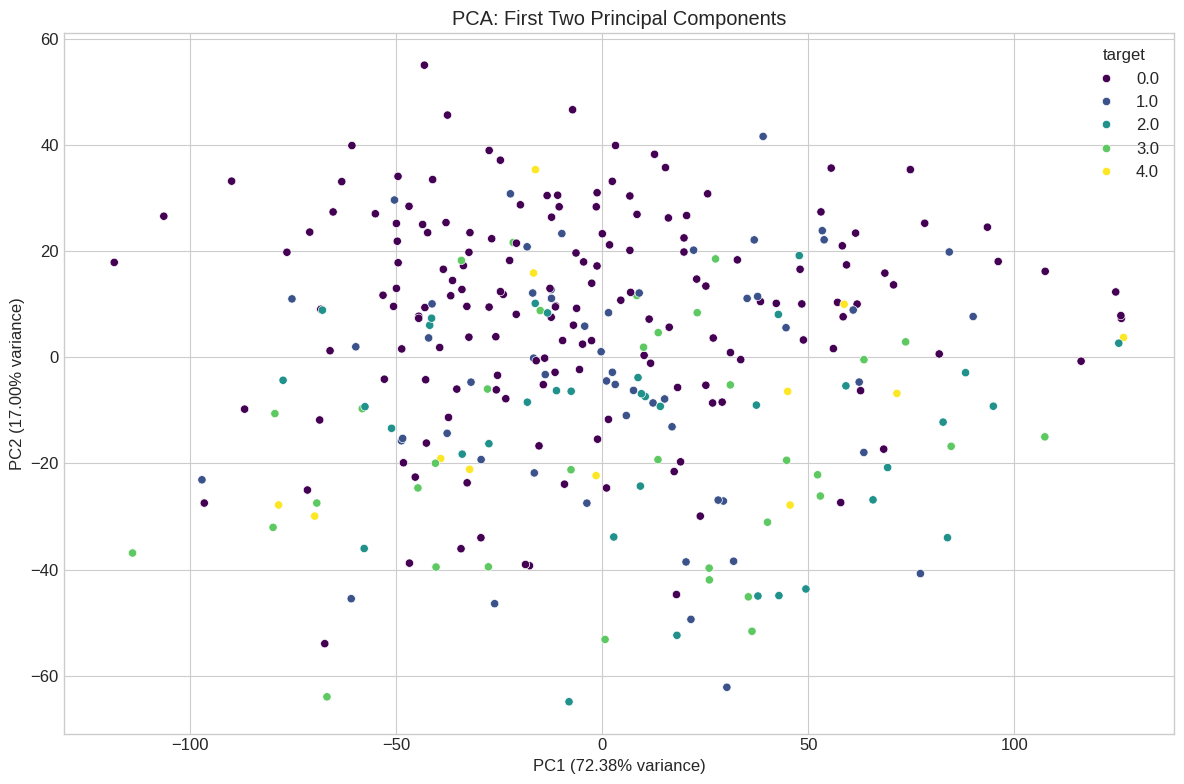

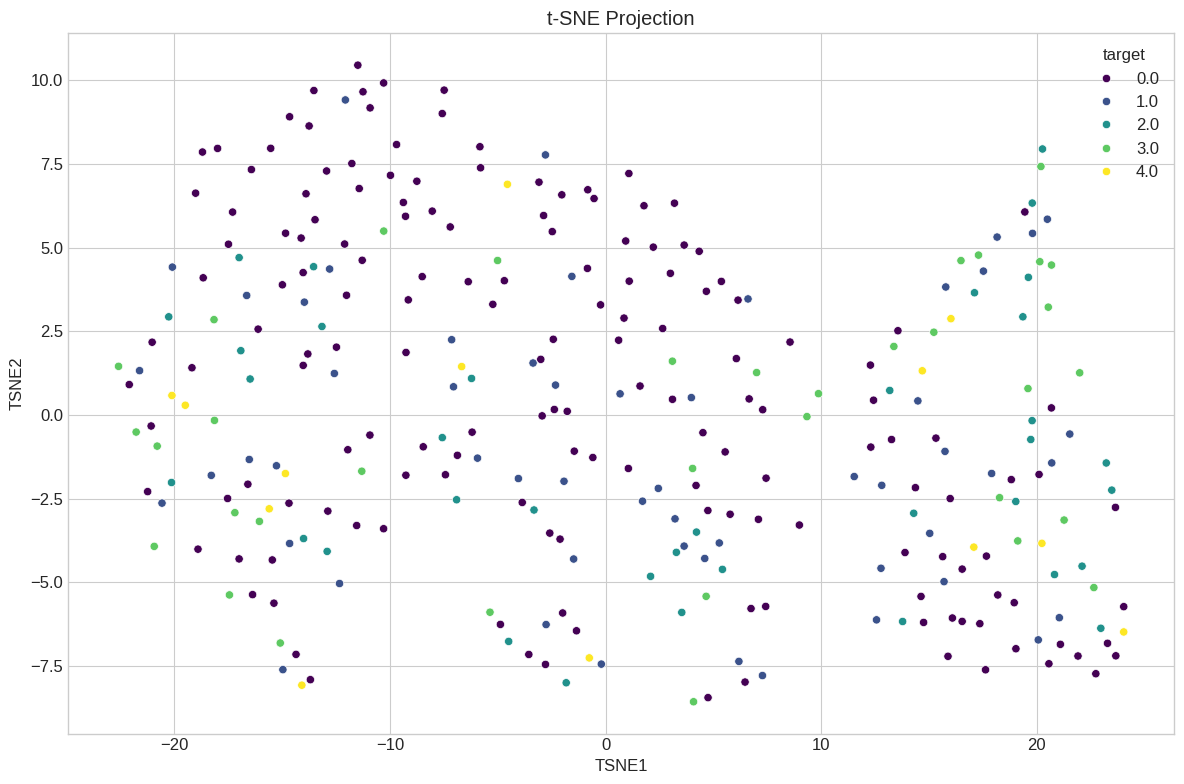

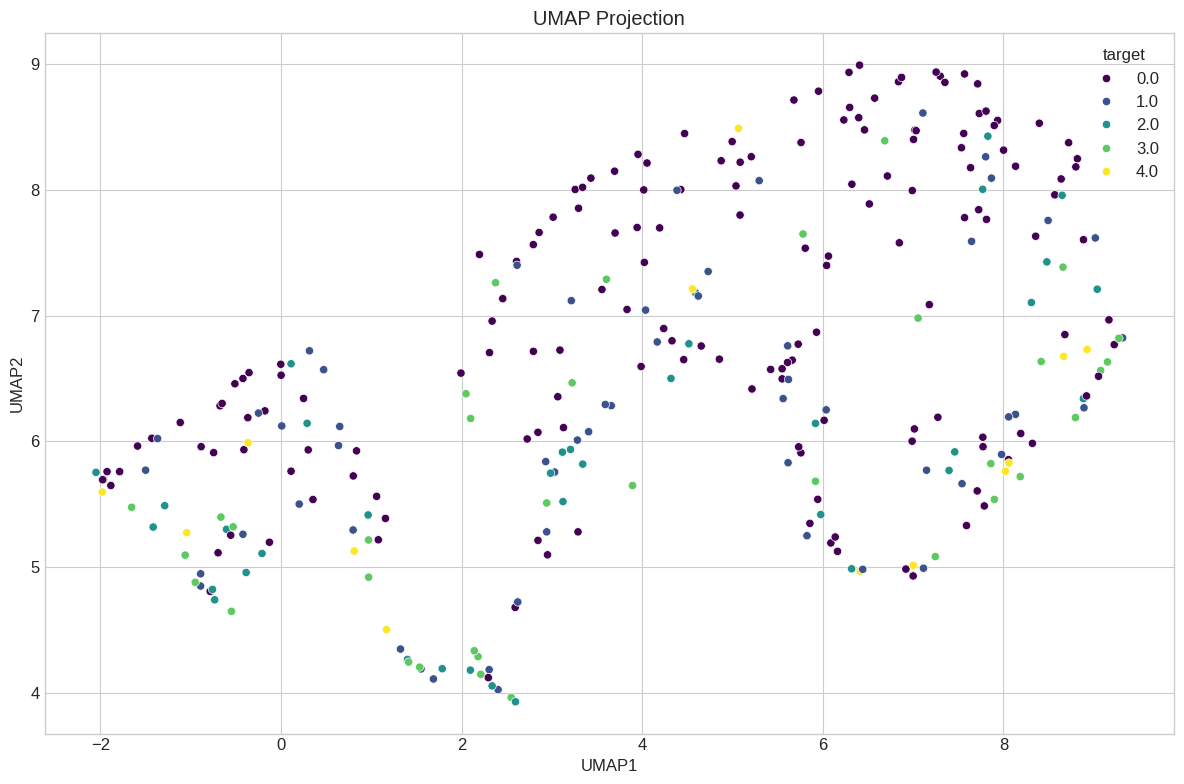


========== FEATURE IMPORTANCE ANALYSIS ==========


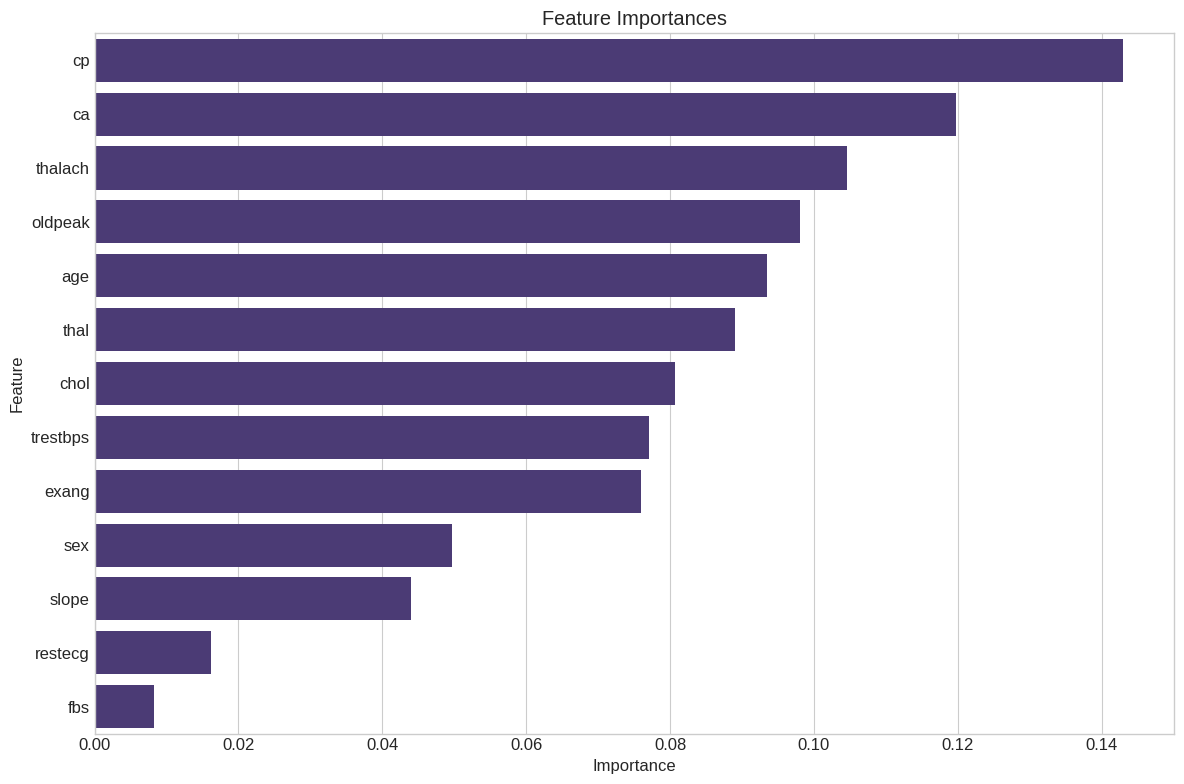


Feature Importance Table:
     Feature  Importance
6         cp    0.142897
11        ca    0.119734
3    thalach    0.104558
4    oldpeak    0.098083
0        age    0.093535
12      thal    0.089059
2       chol    0.080749
1   trestbps    0.077073
9      exang    0.076017
5        sex    0.049736
10     slope    0.044031
8    restecg    0.016256
7        fbs    0.008273

========== CREATING INTERACTIVE DASHBOARD ==========



========== SAVING PROCESSED DATA ==========
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processed data saved to Google Drive.
Processed data saved to local CSV files.

========== SUMMARY ==========
Data preprocessing and visualization complete!
Key findings:
1. The dataset contains information on 303 patients.
2. Top features correlated with heart disease:
   - cp: 0.1429
   - ca: 0.1197
   - thalach: 0.1046
   - oldpeak: 0.0981
   - age: 0.0935
3. Visualizations displayed and saved.
4. Processed datasets saved as CSV files.


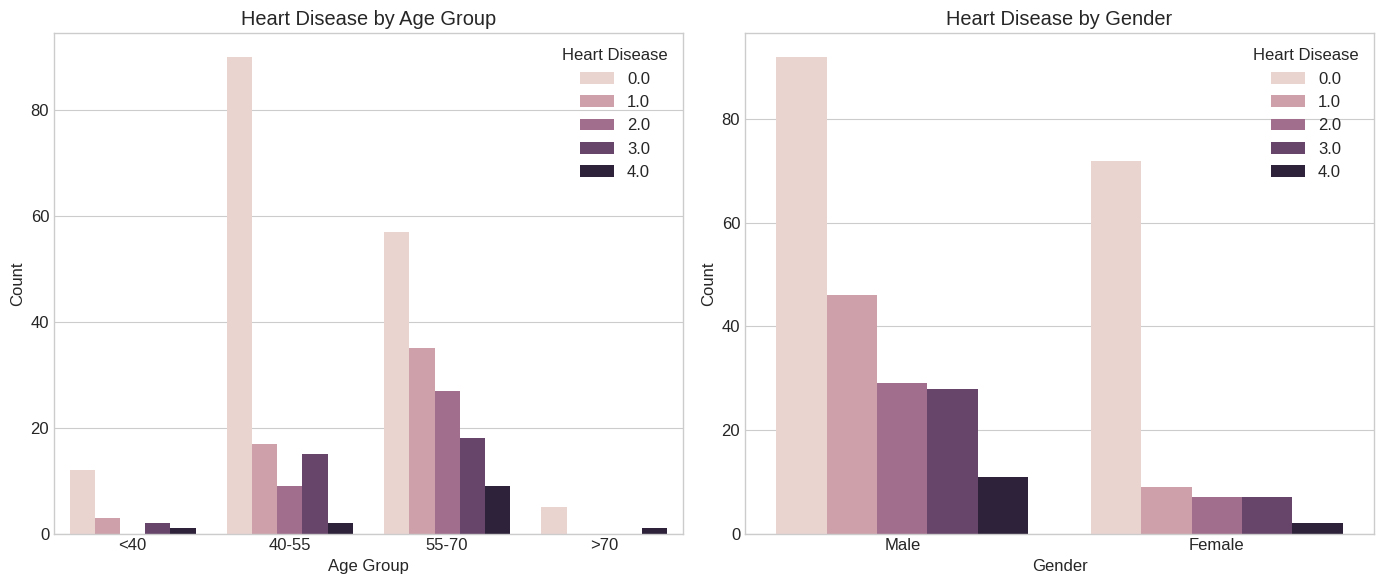


Thank you for using this advanced data preprocessing and visualization script!


In [5]:
"""
Advanced Data Preprocessing and Visualization
Author: [Your Name]
Date: March 2025

This script performs comprehensive data preprocessing and visualization on the UCI Heart Disease dataset.
Features include:
- Missing value handling
- Outlier detection and treatment
- Feature engineering
- Exploratory data analysis
- Interactive visualizations
- Dimensionality reduction
- Feature importance analysis
"""

# Install required packages
# In Colab, we need to install these packages
!pip install pandas numpy matplotlib seaborn plotly scikit-learn umap-learn yellowbrick missingno ydata-profiling

# --------------------- IMPORT LIBRARIES ---------------------
# Import basic libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Import machine learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split

# Import specialized visualization libraries
import missingno as msno
from ydata_profiling import ProfileReport

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# --------------------- DOWNLOAD AND LOAD DATA ---------------------
# Download the UCI Heart Disease dataset (Cleveland)
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data -O heart_disease.csv

# Define column names (the original dataset doesn't have headers)
print("Loading dataset...")
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Load the dataset into a pandas DataFrame
df = pd.read_csv('heart_disease.csv', header=None, names=column_names)

# Explore the data - basic overview
print("\nDataset Overview:")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print("\nData Types:")
print(df.dtypes)

print("\nSummary Statistics:")
print(df.describe())

print("\nChecking for missing values:")
print(df.isnull().sum())

# --------------------- INITIAL DATA PREPROCESSING ---------------------
# Convert '?' values to NaN (missing values)
for col in df.columns:
    df[col] = df[col].replace('?', np.nan)

# Define numeric and categorical columns
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Convert numeric columns to appropriate types
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert categorical columns to numeric types
for col in categorical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nUpdated missing values after conversion:")
print(df.isnull().sum())

# --------------------- MISSING VALUE ANALYSIS ---------------------
print("\n========== MISSING VALUE ANALYSIS ==========")
# Visualize missing values with a matrix
plt.figure(figsize=(12, 6))
msno.matrix(df)
plt.title('Missing Value Matrix')
plt.tight_layout()
plt.show()

# Visualize missing values with a bar chart
plt.figure(figsize=(12, 6))
msno.bar(df)
plt.title('Missing Value Bar Chart')
plt.tight_layout()
plt.show()

# --------------------- MISSING VALUE IMPUTATION ---------------------
print("\nImputing missing values...")
# For numeric columns - use KNN imputation (more sophisticated approach)
knn_imputer = KNNImputer(n_neighbors=5)
df[numeric_cols] = knn_imputer.fit_transform(df[numeric_cols])

# For categorical columns - use mode imputation (most frequent value)
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

print("Missing values after imputation:")
print(df.isnull().sum())

# --------------------- OUTLIER DETECTION AND TREATMENT ---------------------
print("\n========== OUTLIER ANALYSIS ==========")
# Visualize outliers with boxplots
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Detect outliers using Isolation Forest algorithm
print("\nDetecting outliers with Isolation Forest...")
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['outlier'] = iso_forest.fit_predict(df[numeric_cols])
outliers = df[df['outlier'] == -1]
print(f"Number of detected outliers: {len(outliers)}")

# Treat outliers using capping method (limit values to a defined range)
print("\nTreating outliers with capping method...")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower_bound, upper_bound)

# Remove outlier column as it's no longer needed
df = df.drop('outlier', axis=1)

# --------------------- FEATURE ENGINEERING ---------------------
print("\n========== FEATURE ENGINEERING ==========")
# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 40, 55, 70, 100],
                        labels=['<40', '40-55', '55-70', '>70'])

# Create cholesterol level categories
df['chol_level'] = pd.cut(df['chol'], bins=[0, 200, 240, 500],
                         labels=['Normal', 'Borderline', 'High'])

# Create blood pressure categories
df['bp_category'] = pd.cut(df['trestbps'], bins=[0, 120, 140, 300],
                          labels=['Normal', 'Prehypertension', 'Hypertension'])

# Simulate height and weight for BMI calculation (for demonstration)
# Note: These are not real values, just for demonstration purposes
np.random.seed(42)
df['height'] = np.random.normal(170, 10, size=len(df))  # cm
df['weight'] = np.random.normal(75, 15, size=len(df))   # kg
df['bmi'] = df['weight'] / ((df['height']/100) ** 2)
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100],
                          labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Calculate heart rate reserve
df['max_hr'] = 220 - df['age']  # Theoretical maximum heart rate
df['hr_reserve'] = df['max_hr'] - df['thalach']  # Heart rate reserve

# --------------------- FEATURE SCALING ---------------------
print("\nScaling numerical features...")
# Apply standard scaling (mean=0, std=1)
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Display the results of feature engineering
print("\nResults of feature engineering:")
print(df[['age', 'age_group', 'chol', 'chol_level', 'trestbps',
         'bp_category', 'bmi', 'bmi_category']].head(10))

# --------------------- EXPLORATORY DATA ANALYSIS ---------------------
print("\n========== EXPLORATORY DATA ANALYSIS ==========")

# 1. Distribution of target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease Classes')
plt.xlabel('Heart Disease (0 = No, 1-4 = Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2. Age distribution by heart disease
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='target', bins=20, multiple='stack')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 3. Cholesterol by heart disease
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.tight_layout()
plt.show()

# 4. Heart rate vs. age with disease status
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='thalach', hue='target', data=df, palette='viridis')
plt.title('Maximum Heart Rate vs. Age')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.tight_layout()
plt.show()

# 5. Gender distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='sex', hue='target', data=df)
plt.title('Heart Disease by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 6. Correlation matrix
plt.figure(figsize=(14, 10))
corr_matrix = df[numeric_cols + ['target']].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# --------------------- ADVANCED VISUALIZATIONS WITH PLOTLY ---------------------
print("\n========== ADVANCED VISUALIZATIONS ==========")

# 1. 3D Scatter plot of age, cholesterol, and heart rate
fig = px.scatter_3d(df, x='age', y='chol', z='thalach', color='target',
                   title='3D Scatter Plot: Age, Cholesterol, Heart Rate',
                   labels={'age': 'Age', 'chol': 'Cholesterol', 'thalach': 'Max Heart Rate'})
fig.show()

# 2. Parallel coordinates plot for multivariate analysis
fig = px.parallel_coordinates(df,
                             color='target',
                             dimensions=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'],
                             title='Parallel Coordinates Plot of Heart Disease Features')
fig.show()

# 3. Radar chart for different heart disease classes
fig = go.Figure()

for target_val in df['target'].unique():
    subset = df[df['target'] == target_val]
    mean_vals = subset[numeric_cols].mean()
    fig.add_trace(go.Scatterpolar(
        r=mean_vals.values,
        theta=mean_vals.index,
        fill='toself',
        name=f'Class {target_val}'
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
        )),
    showlegend=True,
    title='Radar Chart of Mean Values by Heart Disease Class'
)
fig.show()

# 4. Sunburst chart for hierarchical view
fig = px.sunburst(df,
                 path=['sex', 'age_group', 'chol_level'],
                 color='target',
                 title='Hierarchical View of Demographics and Heart Disease')
fig.show()

# --------------------- DIMENSIONALITY REDUCTION FOR VISUALIZATION ---------------------
print("\n========== DIMENSIONALITY REDUCTION ==========")

# Select features for dimensionality reduction
features_for_dr = numeric_cols

# 1. PCA (Principal Component Analysis)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[features_for_dr])
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_pca['target'] = df['target']

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca, palette='viridis')
plt.title('PCA: First Two Principal Components')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.tight_layout()
plt.show()

# 2. t-SNE (t-Distributed Stochastic Neighbor Embedding)
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df[features_for_dr])
df_tsne = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])
df_tsne['target'] = df['target']

plt.figure(figsize=(12, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='target', data=df_tsne, palette='viridis')
plt.title('t-SNE Projection')
plt.tight_layout()
plt.show()

# 3. UMAP (Uniform Manifold Approximation and Projection)
reducer = umap.UMAP(random_state=42)
umap_result = reducer.fit_transform(df[features_for_dr])
df_umap = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2'])
df_umap['target'] = df['target']

plt.figure(figsize=(12, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='target', data=df_umap, palette='viridis')
plt.title('UMAP Projection')
plt.tight_layout()
plt.show()

# --------------------- FEATURE IMPORTANCE ANALYSIS ---------------------
print("\n========== FEATURE IMPORTANCE ANALYSIS ==========")

# Prepare data for modeling
# Convert target to binary (0 = no disease, 1 = disease)
X = df[numeric_cols + ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']]
y = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a simple Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

# Display feature importances as a table
print("\nFeature Importance Table:")
print(importances)

# --------------------- INTERACTIVE DASHBOARD WITH PLOTLY ---------------------
print("\n========== CREATING INTERACTIVE DASHBOARD ==========")

# Create a dashboard with multiple plots
dashboard = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Age vs. Heart Rate by Disease Status',
                   'Cholesterol Distribution by Disease Status',
                   'Blood Pressure vs Age by Disease Status',
                   'Feature Importances'),
    specs=[[{'type': 'scatter'}, {'type': 'box'}],
           [{'type': 'scatter'}, {'type': 'bar'}]]
)

# Plot 1: Age vs. Heart Rate
for target_val in sorted(df['target'].unique()):
    subset = df[df['target'] == target_val]
    dashboard.add_trace(
        go.Scatter(
            x=subset['age'],
            y=subset['thalach'],
            mode='markers',
            name=f'Class {target_val}',
            marker=dict(size=8)
        ),
        row=1, col=1
    )

# Plot 2: Cholesterol Distribution
for target_val in sorted(df['target'].unique()):
    subset = df[df['target'] == target_val]
    dashboard.add_trace(
        go.Box(
            y=subset['chol'],
            name=f'Class {target_val}'
        ),
        row=1, col=2
    )

# Plot 3: Blood Pressure vs Age
for target_val in sorted(df['target'].unique()):
    subset = df[df['target'] == target_val]
    dashboard.add_trace(
        go.Scatter(
            x=subset['age'],
            y=subset['trestbps'],
            mode='markers',
            name=f'Class {target_val}',
            marker=dict(size=8)
        ),
        row=2, col=1
    )

# Plot 4: Feature Importances
dashboard.add_trace(
    go.Bar(
        x=importances['Importance'][:8],
        y=importances['Feature'][:8],
        orientation='h'
    ),
    row=2, col=2
)

# Update dashboard layout
dashboard.update_layout(
    height=800,
    width=1200,
    title_text='Heart Disease Analysis Dashboard',
    showlegend=False
)

dashboard.show()

# --------------------- COMPREHENSIVE REPORT GENERATION ---------------------
# Uncomment the following lines to generate a comprehensive report
# Note: This can take some time to complete
"""
print("\n========== GENERATING COMPREHENSIVE REPORT ==========")
profile = ProfileReport(df, title="Heart Disease Dataset Profiling Report", minimal=True)
profile.to_file("heart_disease_profile_report.html")
"""

# --------------------- SAVE PROCESSED DATA ---------------------
print("\n========== SAVING PROCESSED DATA ==========")
# In Colab, we can save to drive if mounted
from google.colab import drive
drive.mount('/content/drive')

# Save to drive
df.to_csv('/content/drive/My Drive/processed_heart_disease.csv', index=False)
df_scaled.to_csv('/content/drive/My Drive/scaled_heart_disease.csv', index=False)
print("Processed data saved to Google Drive.")

# Or save locally
df.to_csv('processed_heart_disease.csv', index=False)
df_scaled.to_csv('scaled_heart_disease.csv', index=False)
print("Processed data saved to local CSV files.")

# --------------------- SUMMARY AND CONCLUSIONS ---------------------
print("\n========== SUMMARY ==========")
print("Data preprocessing and visualization complete!")
print("Key findings:")
print("1. The dataset contains information on", len(df), "patients.")
print("2. Top features correlated with heart disease:")
for i, row in importances.head(5).iterrows():
    print(f"   - {row['Feature']}: {row['Importance']:.4f}")
print("3. Visualizations displayed and saved.")
print("4. Processed datasets saved as CSV files.")

# Additional analysis: Heart disease by age group and gender
plt.figure(figsize=(14, 6))
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='age_group', hue='target', data=df, ax=ax1)
plt.title('Heart Disease by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Heart Disease')

ax2 = plt.subplot(1, 2, 2)
# Convert gender to text for better readability
df['gender'] = df['sex'].map({0: 'Female', 1: 'Male'})
sns.countplot(x='gender', hue='target', data=df, ax=ax2)
plt.title('Heart Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Heart Disease')

plt.tight_layout()
plt.show()

print("\nThank you for using this advanced data preprocessing and visualization script!")




